<a href="https://colab.research.google.com/github/Hrishita-Dalal/CPML24_Projects_and_Labs/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

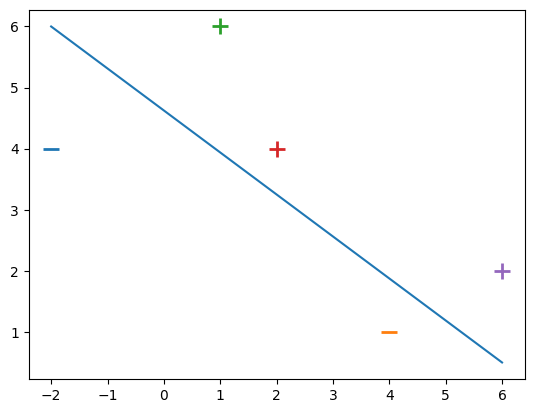

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

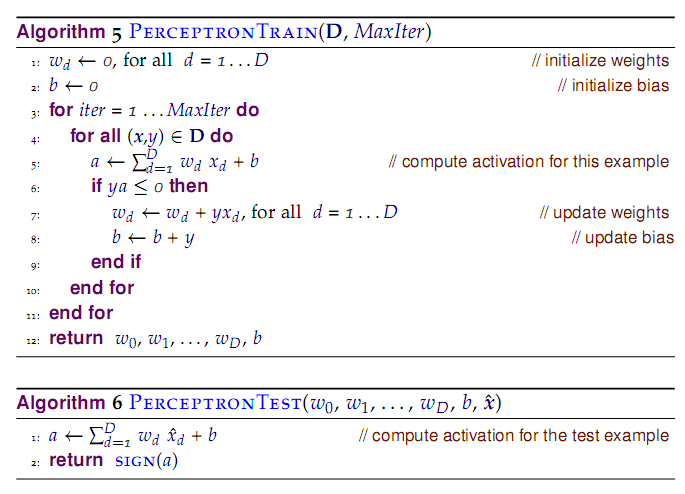

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [70]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 150
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

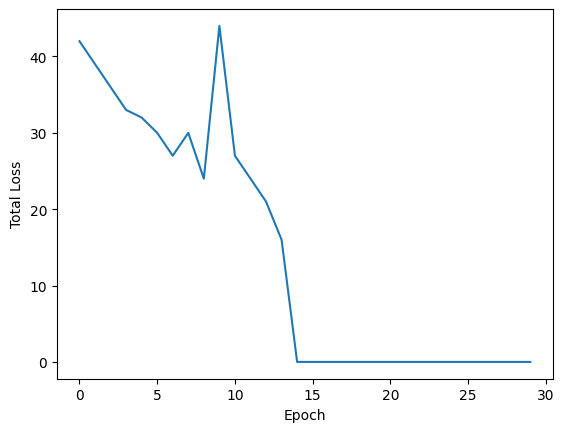

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

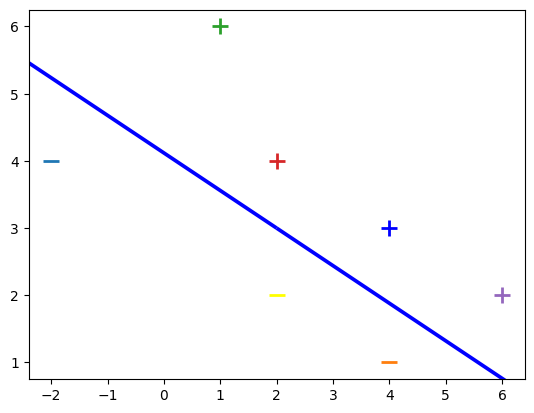

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


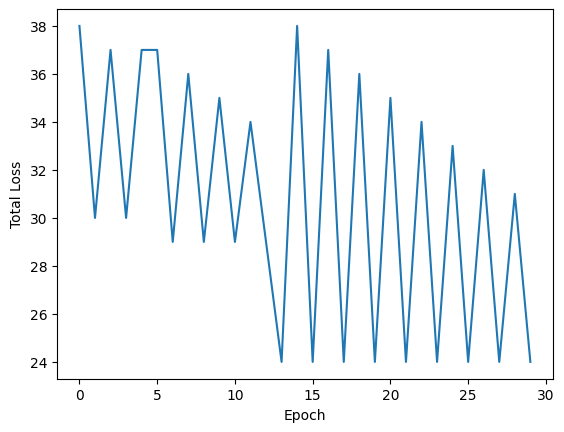

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

# Perceptron on Sonar dataset

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = pd.read_csv(url, header=None)

In [15]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
y = np.where(y == 'R', -1, 1)  # Convert labels to -1 and 1

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
class Perceptron:
    def __init__(self, learning_rate, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors = []

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.errors = []

        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
                errors += int(update != 0.0)
            self.errors.append(errors)

    def predict(self, X):
        return np.where((np.dot(X, self.weights) + self.bias) >= 0.0, 1, -1)

In [89]:
perceptron = Perceptron(learning_rate=0.01, n_iterations=150)

array([0.42997371, 0.35316085])

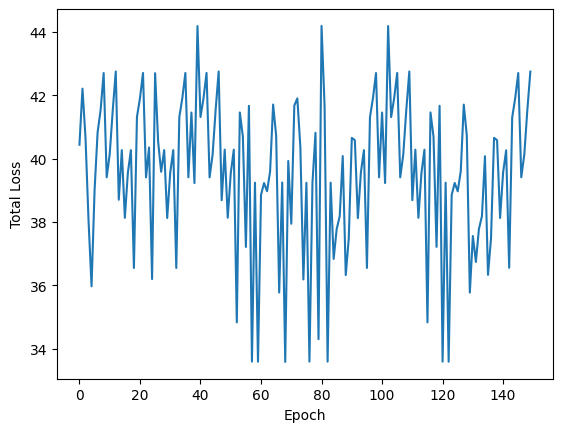

In [90]:
perceptron_algo_plot(X_train, y_train)

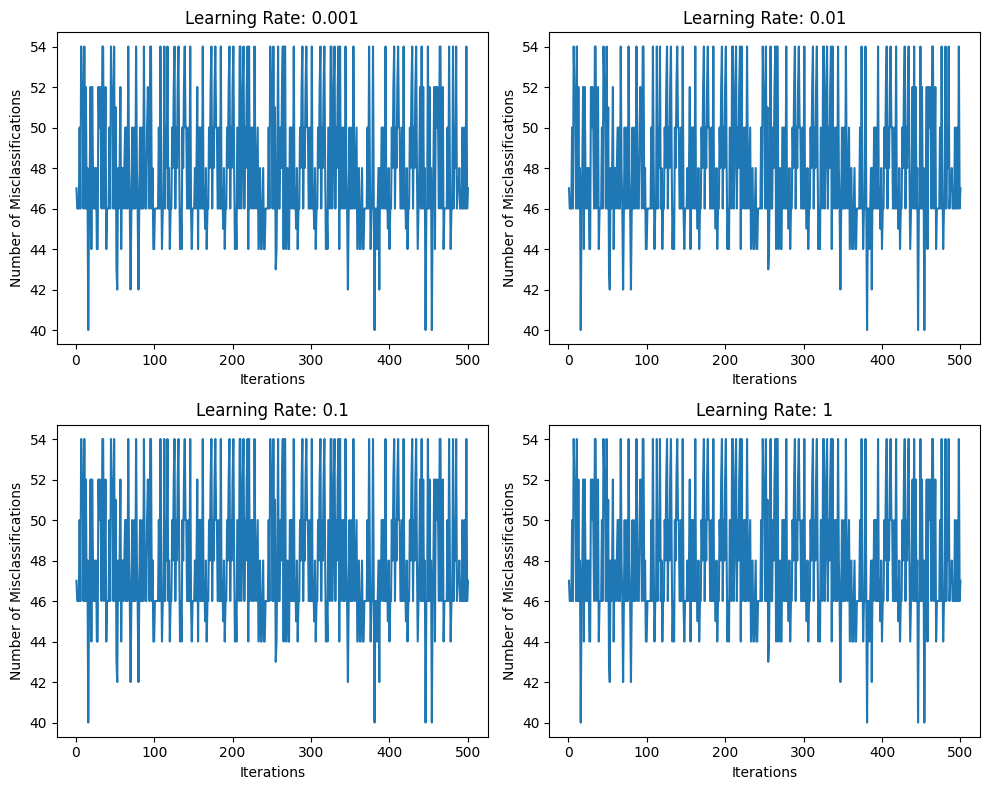

In [88]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.ravel()
learning_rates = [0.001, 0.01, 0.1, 1]

for i, lr in enumerate(learning_rates):
    perceptron = Perceptron(learning_rate=lr, n_iterations=500)
    perceptron.fit(X_train, y_train)

    axes[i].plot(range(1, len(perceptron.errors) + 1), perceptron.errors)
    axes[i].set_title(f'Learning Rate: {lr}')
    axes[i].set_xlabel('Iterations')
    axes[i].set_ylabel('Number of Misclassifications')

plt.tight_layout()
plt.show()

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

**Answers:**
1. Yes, this dataset is learnable by a Perceptron. The AND function is linearly separable, meaning a straight line can be drawn to perfectly separate the two classes (+ and -). The Perceptron algorithm is guaranteed to converge and find a solution for linearly separable datasets.

In [ ]:
# Dataset
# x1  x2  y
# 0	  0	 -1
# 0	  1	 -1
# 1	  0	 -1
# 1	  1	  1

# Iteration 1:
# (0, 0, -1): Prediction is -1 (correct). No update.
# (0, 1, -1): Prediction is -1 (correct). No update.
# (1, 0, -1): Prediction is -1 (correct). No update.
# (1, 1, 1): Prediction is -1 (incorrect). Update weights and bias:
# w = [0 + 1, 0 + 1] = [1, 1]
# b = 0 + 1 = 1

# Iteration 2:
# (0, 0, -1): Prediction is -1 (correct). No update.
# (0, 1, -1): Prediction is 0, assigned -1 (incorrect but no update as output should be -1 and pred is -1)
# (1, 0, -1): Prediction is 0, assigned -1(incorrect but no update as output should be -1 and pred is -1).
# (1, 1, 1): Prediction is 1 (now correct!). No update.

2. Out of the 16 possible distinct boolean functions over a 2-bit binary input, a Perceptron can learn 14 of them. This is because the Perceptron is a linear classifier, meaning it can only learn functions that are linearly separable.

In [ ]:
# The two boolean functions that are not learnable by a Perceptron are XOR and XNOR

# XOR:
# x1  x2  y
# 0	  0   0
# 0	  1	  1
# 1	  0	  1
# 1	  1	  0

# XNOR:
# x1  x2  y
# 0	  0   1
# 0	  1   0
# 1	  0   0
# 1   1   1